# Author: Deepika Chinnala

# PROBLEM STATEMENT: 
### Predict the percentage of a student based on the number of study hours using Simple Linear Regression

#### Essentially —


To create a linear model that quantitatively relates the percentage of the student based on the number of hours the student studied

To know the accuracy of the model, i.e. how well these variables can predict 

So interpretation is important!

# Step 1: Reading and Understanding the Data

### Let us first import NumPy and Pandas and read the  dataset

In [79]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing the pandas_profile
%matplotlib inline

In [80]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [81]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
# Check the head of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Inspect the various aspects of the dataframe

In [82]:
df.shape

(25, 2)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [84]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [85]:
#checking the null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 2: Visualising the Data

#### Let's now spend some time doing what is arguably the most important step - understanding the data.

#### We'll visualise our data using matplotlib and seaborn.

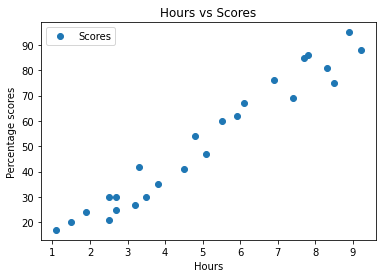

In [86]:
#Plotting the distribution of scores
df.plot(x="Hours",y="Scores",style='o')
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Percentage scores")
plt.show()

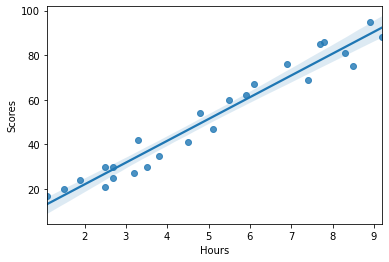

In [87]:
#Plotting the reg plot if there is any linearity between the variables
sns.regplot(x="Hours",y="Scores",data=df)
plt.show()

<AxesSubplot:>

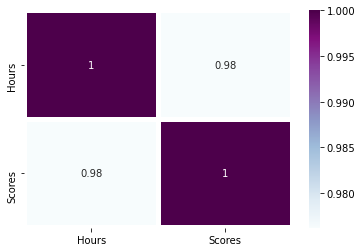

In [88]:
#plotting the heatmap to know the correlation between the variables
sns.heatmap(df.corr(),annot=True,linewidths=4,cmap='BuPu')

In [89]:
# Now, separating the data set as input and predicted variable
X = df[['Hours']]
y = df['Scores']

# Step 4: Splitting the Data into Training and Testing Sets

### As you know, the first basic step for regression is performing a train-test split.

In [90]:
#importing the required libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [92]:
X_train.head()

,Hours
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3


In [93]:
y_train.head()

23    76
14    17
1     47
10    85
13    42
Name: Scores, dtype: int64

In [94]:
lr = LinearRegression()
lr.fit(X_train,y_train)

print("Fitted the model")

Fitted the model


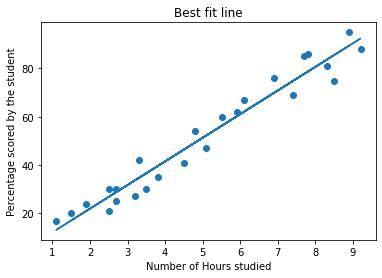

In [95]:
#Plotting the regression line
line = lr.coef_*X+lr.intercept_

#plotting for the test data
plt.title('Best fit line')
plt.xlabel('Number of Hours studied')
plt.ylabel('Percentage scored by the student')
plt.scatter(X,y)
plt.plot(X,line)
plt.show()


# Step 5:Predicting the model

In [96]:
#Predicting the scores
y_pred = lr.predict(X_test)
print(X_test)
print(y_pred)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8
[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [97]:
#Comparing the actual with predicted
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


# Step 6: Predicting the score value for 9.25 Hours per day

In [98]:
#checking the output
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


# Step 7: Calculating the Errors and Accuracy of the model

In [99]:
print('Mean Absolute Error:{}'.format(mean_absolute_error(y_test,y_pred)))
print('Mean Squared Error:{}'.format(mean_squared_error(y_test,y_pred)))
print('Root Mean Square Error:{}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('R2 score:{}'.format(r2_score(y_test,y_pred)))

Mean Absolute Error:4.419727808027652
Mean Squared Error:22.96509721270043
Root Mean Square Error:4.792191274636315
R2 score:0.9568211104435257


# Thank you 

# Happy Coding